#**Stay Connected: Insights to Power Telecom Customer Retention**
____
##**01. Background, Problem Statements, & Objectives**
###**1.1 Background**
It is important to note that competition in the telecommunications industry is typically high. This is due to the fact that the products offered by companies in this industry tend to be similar, providing customers with a wide range of options in the market. The abundance of product options available to customers can potentially lead to a higher rate of attrition, where existing subscribers may choose to discontinue their subscriptions to products they have previously purchased. From a business perspective, customer churn can have a negative impact on a company's financial health, as it leads to the loss of potential revenue and a reduction in market share. Therefore, maintaining customer retention is crucial. It is essential for the company to understand why a customer chooses not to continue subscribing to its services if it wishes to maintain profitability and market share. Furthermore, it is more cost-effective to retain existing customers than to constantly seek new ones. Consequently, companies must regularly assess their customers who have subscribed but subsequently cancel their service.
###**1.2 Problem Statements**
Based on the provided background information, the Business & Data Analyst will help the Marketing and Sales Teams identify the dynamics behind customer churn using existing data. The Analyst will also address the issues identified in this project. The issues to be addressed in this project are as follows:
1. What factors cause customers to unsubscribe?
2. Based on the identified factors, what business strategies can be implemented to reduce customer churn?
3. What business steps can be taken to mitigate customer churn, maintain market share, and preserve profitability based on the known factors?

###**1.3 Objectives**
The objectives of this project are as follows:

1. Identify customer characteristics that tend to result in churn.
Examples:

- Do customers with short subscription periods (low tenure) churn more?

- Are customers with high monthly costs more prone to churn?

Objective: to determine high-risk customer segments so the marketing team can target them.

2. Analyze churn differences based on contract type.
Example:

- Do customers with month-to-month contracts have significantly higher churn rates than those with one- or two-year contracts?

Objective: Provide the product/pricing team with insights to encourage customers to choose long-term packages.

3. Analyze the impact of add-on services on churn.
Example:

- Are customers who only subscribe to internet service more likely to churn than customers who subscribe to internet service and purchase other add-on products, such as online security, device protection, tech support, streaming TV, and streaming movies?

- Are customers who only subscribe to phone service more likely to churn than customers who subscribe to phone service and purchase other add-on products, such as multiple lines?

Objective: Determine whether cross-selling or bundling services is an effective retention strategy.

## **02. Data Understanding & Preparation**

Here, we begin exploring and preparing our dataset to ensure it's ready for analysis. This includes understanding the structure, cleaning, and transforming the data.


###**2.1. Import Packages & Dataset**

Essential libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn` are imported to support data handling and visualization throughout the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
from google.colab import files

upload = files.upload()

Saving Telco Churn.csv to Telco Churn.csv


###**2.2 Understanding Dataset**

This sub-section helps us understand what the dataset contains by describing each feature and how it might relate to customer churn.

####**About Dataset**
To understand the Dataset more, below are the description for each column that is being provided from the source. This description info will help us to get the sense and understand any answers, especially if it is being stored in a "code" format.

source: https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113


| Column  | Description|
|-------- |----------------------|
|customerID |  A unique ID that identifies each customer. |
|gender |The customer's gender: Male, Female |
|SeniorCitizen | Indicates if the customer is 65 or older: 1=Yes, 0=No|
|Partner |Indicates if the customer is married: Yes, No |
|Dependents |Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.|
|tenure |Number of months the customer has stayed with the company|
|PhoneService |Indicates if the customer subscribes to home phone service with the company: Yes, No |
|MultipleLines |Indicates if the customer has multiple lines or not: Yes, No, No phone service|
|InternetService |Customer's internet service provider: DSL, Fiber optic, No |
|OnlineSecurity |Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service |
|OnlineBackup | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service|
|DeviceProtection |Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service |
|TechSupport | Indicates if the customer subscribes to tech support service by the company: Yes, No, No internet service|
|StreamingTV | Indicates if the customer subscribes to streaming TV plan: Yes, No, No internet service|
|StreamingMovies |Indicates if the customer subscribes to streaming Movie plan: Yes, No, No internet service |
|Contract |The contract term of the customer: Month-to-month, One year, Two year |
|PaperlessBilling |Whether the customer chose paperless billing or not: Yes, No |
|PaymentMethod |The customer's payment method: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)|
|MonthlyCharges |The amount charged to the customer monthly for all their services |
|TotalCharges | The total amount charged to the customer|
|Churn |Whether the customer churned (left the company) or not: Yes, No |


####**1. Read Dataset**

We load the dataset into a DataFrame using pandas to begin exploring its contents.

In [3]:
telco_df = pd.read_csv('Telco Churn.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


####**2. Dataset Description**

We check the structure and schema of the dataset using `.info()` and `.head()` to understand data types, null values, and the shape of the data.

In [4]:
# Display basic information about the dataset

telco_df.info(), telco_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

When reviewing the Telco data, the data types are reasonable except for TotalCharges, which actually shows the total amount paid by customers for services provided by the company. Total costs should be numerical rather than categorical (object). Therefore, the data type for TotalCharges should be float.

In [5]:
# Display descriptive statistic for the dataset
display(telco_df.describe(include="number"))
display(telco_df.describe(include="object"))

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
# Display unique values in each columns

summary = []

# Loop through each column
for i in telco_df.columns:
    unique_values = telco_df[i].unique()
    summary.append({
        "Column Name": i,
        "# Unique Values": len(unique_values),
        "Unique Values": unique_values
    })

# Convert to DataFrame for display
unique_summary = pd.DataFrame(summary)

display(unique_summary)


,Column Name,# Unique Values,Unique Values
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


Based on the descriptive information and unique values, below are the first conclusion that can be understood from the current data:

**Based on Data Types**
1. TotalCharges is in object type data. Thus, to make a better analysis, we should change this into float

**Based on Data Range (Outliers)**
1. Tenure showed "0" values, which doesn't makes sense, unless there is other explenation.
2. TotalCharges showed the minimum value as " ", meaning there is an undectected missing values

**Missing Values**
1. Need to deep dive more on every column that has " " value or other string? "N/A" value

Every condition from this current dataset, needs to be treated properly with data pre processing and cleaning.

##**03. Data Cleaning & Pre-processing**

In this section, we perform:
- Handling missing values (including hidden missing values)
- Removing duplicates
- Detecting anomalies and/or outliers by using boxplot and IQR method especially for numerical data type
- Ensuring correct data types

This step ensures the dataset is clean and ready for analysis.

###**3.1 Duplicated Data**

Duplicate data can negatively impact the analysis by skewing results or introducing bias. In this section, we check for any repeated rows that might represent the same customer recorded more than once.

If duplicates are found, we remove them to ensure the integrity and reliability of our analysis.

In [7]:
# Check for duplicate rows

telco_df.duplicated().sum()

np.int64(0)

Based on the analysis, there is **NO DUPLICATED DATA FOUND**

###**3.2 Missing Values Treatment**

Handling missing data is a crucial step to ensure accurate analysis. Incomplete values can lead to misleading conclusions or cause errors during modeling.

In this section, we:
- Identify columns with missing or blank values.
- Analyze the proportion of missing values.
- Apply appropriate strategies to handle them, such as removing rows with missing values or imputing them, depending on the context and business logic.

This process helps us maintain data quality and ensure that our analysis remains robust and meaningful.


####**Check Missing Values in Each Column**

In [8]:
telco_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
# Total missing values per column
missing_count = telco_df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(telco_df)) * 100

# Combine into one DataFrame
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})

# Sort by highest percentage
missing_table = missing_table.sort_values(by='Percentage (%)', ascending=False)

# Display the table
total_missing = telco_df.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

total_cells = telco_df.shape[0] * telco_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {missing_percentage:.2f}%")

missing_table

Total missing values in dataset: 0
Percentage of missing data: 0.00%


,Missing Values,Percentage (%)
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


When viewed using .isnull, no missing values are detected. However, as seen during the data understanding process, there are missing values that are not visible with the value “ ”, which most likely have a string data type. Therefore, this empty data will be changed to NA using numpy “np.nan”.

####**Change Underlying Missing Values (" ") to NA values**

In [10]:
# Check " " values in TotalCharges

telco_df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


There are 11 missing values with " ", means we need to change and flag this as NA values

In [11]:
# Change space values (" ") detected in TotalCharges to NA

telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(' ', np.nan)

####**Re-Check Missing Values**

In [12]:
# Total missing values per column
missing_count = telco_df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(telco_df)) * 100

# Combine into one DataFrame
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})

# Sort by highest percentage
missing_table = missing_table.sort_values(by='Percentage (%)', ascending=False)

# Display the table
total_missing = telco_df.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

total_cells = telco_df.shape[0] * telco_df.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {missing_percentage:.2f}%")

missing_table

Total missing values in dataset: 11
Percentage of missing data: 0.01%


,Missing Values,Percentage (%)
TotalCharges,11,0.16
gender,0,0.00
SeniorCitizen,0,0.00
Partner,0,0.00
customerID,0,0.00
Dependents,0,0.00
tenure,0,0.00
MultipleLines,0,0.00
PhoneService,0,0.00
OnlineSecurity,0,0.00


Now, the missing values can be detected. There are 11 missing values in TotalCharges. With < 1% degree of missing value, we can drop the rows that contain missing values in TotalCharges

####**Drop Missing Values**

In [13]:
# Drop rows with NA values in TelcoCharges

telco_df = telco_df.dropna(subset=['TotalCharges'])

In [14]:
telco_df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###**3.3 Data Type Conversion**

After we know that there is no other missing values with string type data (" ") in the dataframe, we need to change data type to more appropriate one to optimize the analysis process

In [15]:
# Convert to Float
telco_df['TotalCharges'] = telco_df['TotalCharges'].astype('float64')

In [16]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [17]:
display(telco_df.describe(include="number"))
display(telco_df.describe(include="object"))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


###**3.4 Dropping Data Anomalies & Outliers**

Anomalies and outliers are data points that significantly differ from the rest of the data. While some outliers can offer valuable insights, others might be the result of data entry errors or inconsistencies that could skew our analysis.

In this section, we:
- Detect unusual values or patterns that don't align with expected data behavior.
- Remove anomalies or outliers that are irrelevant or misleading for business understanding (ex: tenure or total charges = 0 despite having a service).
- Ensure the data used for analysis is clean and representative of real customer behavior.

By removing such anomalies, we reduce noise in the dataset and improve the accuracy of our findings.

Here we will check the outliers for 3 columns with numeric data type which are:
1. Tenure
2. MonthlyCharges
3. TotalCharges


####**a. Tenure**

In [18]:
# Checking Data Anomalies on Tenure

telco_df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


Need to check customer with "0" tenure for the service from the telecommunication company. If the customer didn't even join or subscribe any kind of service ever (0 tenure) then, their data doesn't need to be included

In [19]:
filtered_df = telco_df[telco_df['tenure'] == 0]
filtered_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


It showed that the rows containing "0" tenure is also the ones with " " missing values. Thus, we already dropped it in the first process of dropping missing NA.

####**b. Monthly Charges**

In [20]:
# Checking Data Anomalies on Tenure

telco_df['MonthlyCharges'].value_counts()

,count
MonthlyCharges,
20.05,61
19.95,44
19.90,44
19.85,44
19.65,43
...,...
21.45,1
87.75,1
73.10,1


In [21]:
# IQR Method

Q1 = telco_df['MonthlyCharges'].quantile(0.25)
Q3 = telco_df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_monthly = telco_df[ (telco_df['MonthlyCharges'] < lower_bound) | (telco_df['MonthlyCharges'] > upper_bound) ]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers_monthly)}")

# Display the outliers
outliers_monthly


Lower Bound: -45.824999999999996
Upper Bound: 171.27499999999998
Number of outliers: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


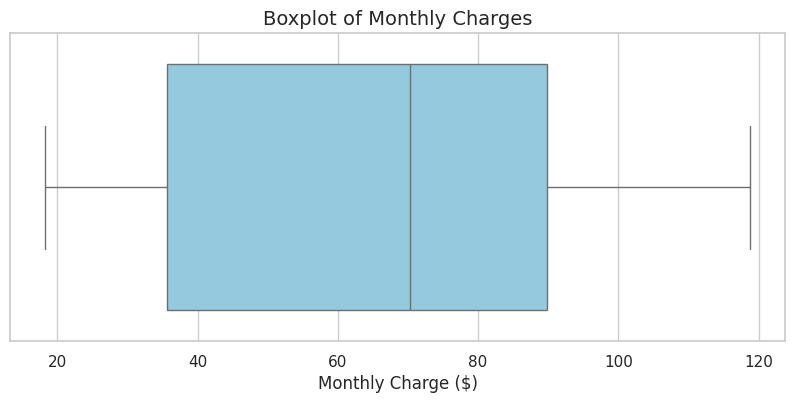

In [22]:
# Outliers treatment Box Plot

# Set figure size and style
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x=telco_df['MonthlyCharges'], color='skyblue')
# Add titles and labels
plt.title("Boxplot of Monthly Charges", fontsize=14)
plt.xlabel("Monthly Charge ($)", fontsize=12)

# Show the plot
plt.show()

Both from IQR and boxplot method showed NO OUTLIERS in MonthlyCharges column

####**c. Total Charges**

In [23]:
# Checking Data Anomalies on Total Charges

telco_df['TotalCharges'].value_counts()

,count
TotalCharges,
20.20,11
19.75,9
19.65,8
19.90,8
20.05,8
...,...
130.15,1
3211.90,1
7843.55,1


In [24]:
# IQR Method

Q1 = telco_df['TotalCharges'].quantile(0.25)
Q3 = telco_df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_total = telco_df[ (telco_df['TotalCharges'] < lower_bound) | (telco_df['TotalCharges'] > upper_bound) ]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers_total)}")

# Display the outliers
outliers_total


Lower Bound: -4688.481250000001
Upper Bound: 8884.66875
Number of outliers: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Both from IQR and boxplot method showed NO OUTLIERS in TotalCharges column

No anomalies or outliers found in the dataset. Then, the data is cleaned and ready to be analyzed

###**3.5 Saving Cleaned Data**

In [25]:
telco_df.to_csv('cleaned_telco.csv', index=False)

In [26]:
from google.colab import files
files.download('cleaned_telco.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **04. Data Analysis**

This section focuses on analyzing customer data to answer the core business questions of this project.

By exploring key features and patterns within the dataset, we aim to uncover the drivers of customer churn. We segment the analysis into multiple perspectives, such as **demographics**, **subscription behavior**, and **service usage patterns** to identify trends and insights that may influence a customer's likelihood to churn.

The insights drawn here directly support the projects objectives:
- Identifying customer characteristics that tend to result in churn.
- Understanding how product combinations and usage behaviors relate to churn (tenure, monthly charges, contract, payment, add ons and multiple lines)
- Providing data-driven recommendations to reduce churn and improve customer retention.

Each visual in this section is used to explore hypotheses and guide strategic decisions for the company.

###**4.1 Demographic vs Churn**

####**1. Gender vs Churn**

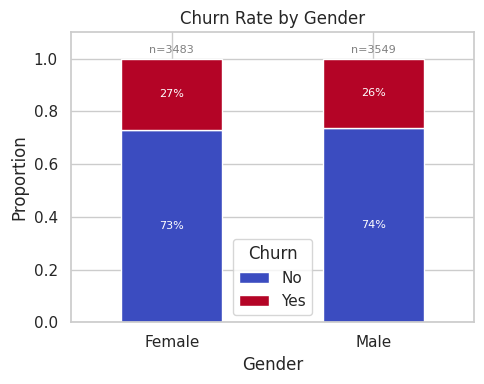

In [84]:
# Group and calculate proportions
churn_by_gender = telco_df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_gender['Total'] = telco_df['gender'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(5, 4))
bars = churn_by_gender[['No', 'Yes']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# Add labels
for i, (index, row) in enumerate(churn_by_gender.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            ax.text(i, bottom + height / 2, f"{height * 100:.0f}%", ha='center', va='center', fontsize=8, color='white')
        bottom += height
    ax.text(i, 1.02, f"n={int(row['Total'])}", ha='center', fontsize=8, color='gray')

plt.ylim(0, 1.1)
plt.show()

*Insight:*
- Both male and female customers show relatively similar churn proportions.
- No significant difference in churn rate between genders.

*Key Takeaway*:
- Gender does not appear to be a strong predictor of churn in this dataset.

*Strategic Recommendation*:
- Focus churn prevention strategies on other segments rather than targeting by gender.
- Gender can still be used to tailor marketing tone or content, but not for prioritizing churn risk.

####**2. Senior Citizen vs Churn**

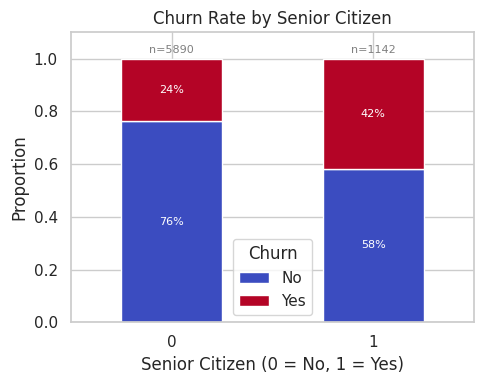

In [85]:
churn_by_senior = telco_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_senior['Total'] = telco_df['SeniorCitizen'].value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
bars = churn_by_senior[['No', 'Yes']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)
plt.title('Churn Rate by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

for i, (index, row) in enumerate(churn_by_senior.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            ax.text(i, bottom + height / 2, f"{height * 100:.0f}%", ha='center', va='center', fontsize=8, color='white')
        bottom += height
    ax.text(i, 1.02, f"n={int(row['Total'])}", ha='center', fontsize=8, color='gray')

plt.ylim(0, 1.1)
plt.show()

*Insight:*
- Senior citizens churn at a significantly higher rate than non-seniors.
- Even with few sample than the other segment, they are more vulnerable to churn.

*Key Takeaway*:
- Senior customers are high-risk churners and need targeted attention.

*Strategic Recommendation*:
- Offer senior-friendly plans, simplified services, and personalized tech support.
- Run retention campaigns tailored to this group, such as: onboarding help, follow up call, etc
- Explore senior loyalty programs or family-assist features.

####**3. Dependents vs Churn**

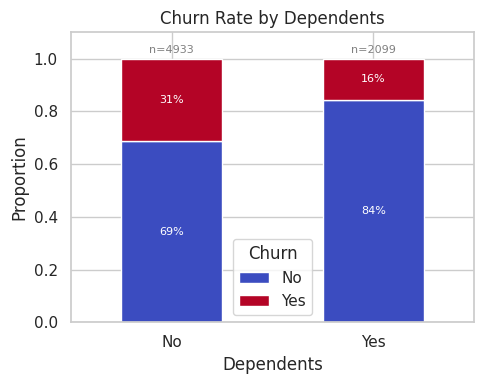

In [87]:
churn_by_dependents = telco_df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_dependents['Total'] = telco_df['Dependents'].value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
bars = churn_by_dependents[['No', 'Yes']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)
plt.title('Churn Rate by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

for i, (index, row) in enumerate(churn_by_dependents.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            ax.text(i, bottom + height / 2, f"{height * 100:.0f}%", ha='center', va='center', fontsize=8, color='white')
        bottom += height
    ax.text(i, 1.02, f"n={int(row['Total'])}", ha='center', fontsize=8, color='gray')

plt.ylim(0, 1.1)
plt.show()

*Insight:*
- Customers without dependents are more likely to churn.
- Having dependents may reflect greater need for reliable and stable service.

*Key Takeaway*:
- Customers with families are more loyal, while individuals are more likely to churn

*Strategic Recommendation*:
- Offer family-friendly packages, like multi-device plans or parental control features

####**4. Partner Status vs Churn**

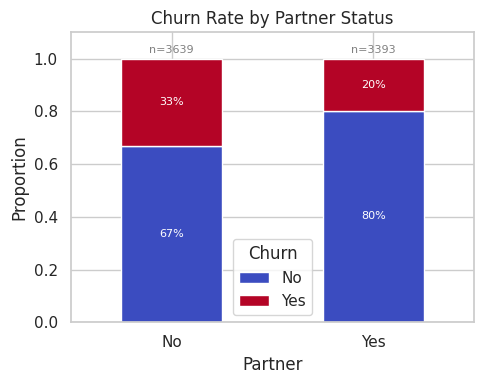

In [86]:
churn_by_partner = telco_df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_by_partner['Total'] = telco_df['Partner'].value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
bars = churn_by_partner[['No', 'Yes']].plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)
plt.title('Churn Rate by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

for i, (index, row) in enumerate(churn_by_partner.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            ax.text(i, bottom + height / 2, f"{height * 100:.0f}%", ha='center', va='center', fontsize=8, color='white')
        bottom += height
    ax.text(i, 1.02, f"n={int(row['Total'])}", ha='center', fontsize=8, color='gray')

plt.ylim(0, 1.1)
plt.show()

**Insight**:
- Customers without a partner churn more frequently.
- Having a partner may indicate higher stability and shared service usage.

**Key Takeaway**:
- Single customers are more churn-prone and may need more individualized offerings.

**Strategic Recommendations**:
- Create solo-living bundles and emphasize independence and value.
- Promote couples/family plans to encourage retention among partnered customers.



###**4.2 Identify customer characteristics that tend to result in churn**

####**1. Tenure vs Churn**

In [27]:
# Data Transformation Tenure Group

telco_df['TenureGroup'] = pd.cut(telco_df['tenure'], bins=[0, 6, 12, 24, 48, 72], labels=['1-6m', '6-12m', '1-2y', '2-4y', '4-6y'])


In [63]:
# Churn Ratio per TenureGroup
churn_by_tenure = telco_df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()
tenure_counts_total = telco_df['TenureGroup'].value_counts().sort_index()

(-0.15, 1.05)

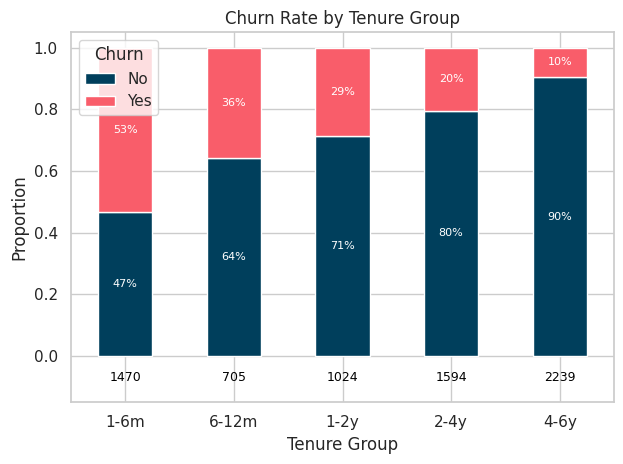

In [66]:
# Visualization
b = churn_by_tenure.plot(kind='bar', stacked=True, color=['#003f5c','#f95d6a'])
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Proportion')
plt.xlabel('Tenure Group')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# Add % labels inside bars
for container in b.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.02:
            b.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height * 100:.0f}%',
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )

# Add total count below each bar
for i, total in enumerate(tenure_counts_total):
    b.text(
        i,
        -0.05,  # slightly below x-axis
        f'{total}',
        ha='center',
        va='top',
        fontsize=9,
        color='black'
    )

plt.ylim(-0.15, 1.05)

**Insights**:
- New customers (1–6 months) have the highest churn rate (53%), indicating early dissatisfaction or weak onboarding.
- Churn rate decreases steadily as tenure increases
- Long-tenured customers (4–6 years) are highly loyal, with a 90% retention rate.
- The number of customers also increases with tenure, especially in the 4–6 years group (2,239 customers), showing a loyal and growing customer base.

**Key Takeaways**:
- Customer loyalty strengthens over time.
- The first year is the most critical period for churn risk.
- Customers who make it past the 1-year mark are much more likely to stay.



####**2. Monthly Charges vs Churn**

To better understand and group customer behavior, we segment monthly telecommunications spending into meaningful tiers. This segmentation is based both on internal dataset distribution and aligned with external industry benchmarks.

According to Reviews.org's 2024 Telecom Spending Report (https://www.reviews.org/internet-service/cost-of-internet-streaming-and-cell-phone-bills/), the average American consumer spends:

$69.43 on home internet

$60.96 on mobile phone plans

$42.38 on streaming services

$88.94 on cable TV

This brings the average total monthly spending on telecommunication services to approximately 272.90 dollars per person. However, individual service charges vary, and for this project, we focus specifically on the MonthlyCharges variable in our dataset, which has a maximum value of 108 dollars.

To segment customers meaningfully within this dataset's actual range, we applied quartile-based binning using the 25th, 50th, and 75th percentiles:

1. Low	($0 – $39.24) for	≤ 25th percentile
2. Mid	($39.24 – $62.71) for	25th–50th percentile
3. Upper Mid	($62.71 – $84.99) for	50th–75th percentile
4. High	(more than $84.99) for	> 75th percentile

This approach allows us to reflect real customer spending behavior within our dataset, while staying aligned with broader industry pricing patterns as referenced from Reviews.org.



In [57]:
# Data Transformation Monthly Charges Group

telco_df['MonthlyGroup'] = pd.cut(telco_df['MonthlyCharges'],
    bins=[0, 39.24, 62.71, 84.99, float('inf')],
    labels=['Low', 'Mid', 'Upper Mid', 'High'],
    right=False)

In [61]:
# Churn Proportion per MonthlyCharges Group

churn_by_monthly = telco_df.groupby('MonthlyGroup')['Churn'].value_counts(normalize=True).unstack()
churn_counts = pd.crosstab(telco_df['MonthlyGroup'], telco_df['Churn'])

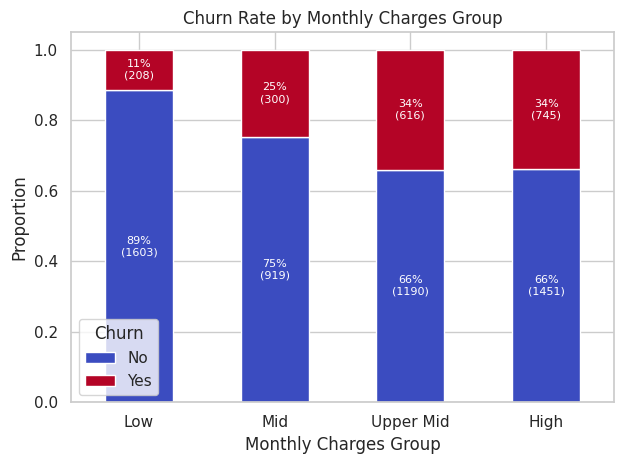

In [62]:
# Visualization
ax = churn_by_monthly.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Churn Rate by Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels: percentage + raw count
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        height = bar.get_height()
        if height > 0.02:
            group = churn_by_monthly.index[j]     # 'Low', 'Mid', etc.
            churn_status = churn_by_monthly.columns[i]  # 'Yes' or 'No'
            count = churn_counts.loc[group, churn_status]
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height * 100:.0f}%\n({count})',  # add count next to %
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )

plt.show()

**Insights**:
- Customers with low monthly charges churn the least:
  - Only 11% churn rate in the Low group (208 churned out of 1811).
- Churn rate increases with monthly charges:
  - Mid: 25% churn
  - Upper Mid and High: 34% churn
- The churn rate plateaus at the Upper Mid and High levels, despite a significant increase in monthly spend.

**Key Takeaways**:
- Higher cost doesn't guarantee loyalty. In fact, it may increase churn risk.
- Customers in the Low monthly charge group are significantly more loyal.



In [33]:
# Correlation

telco_df['ChurnFlag'] = telco_df['Churn'].map({'Yes': 1, 'No': 0})
telco_df[['MonthlyCharges', 'ChurnFlag']].corr()

,MonthlyCharges,ChurnFlag
MonthlyCharges,1.000000,0.192858
ChurnFlag,0.192858,1.000000


###**4.3 Analyze churn differences based on contract type**

####**1. Payment Type vs Churn**

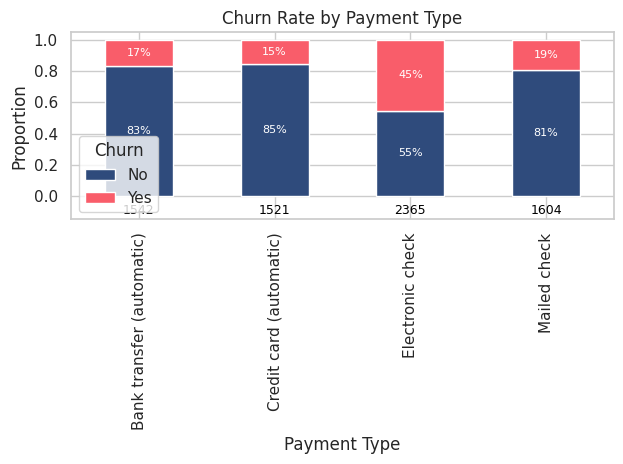

In [72]:
# Payment Type vs Churn

churn_by_payment = telco_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_counts = pd.crosstab(telco_df['PaymentMethod'], telco_df['Churn'])
payment_counts_total = payment_counts.sum(axis=1)  # total per contract type

# Visualization
b = churn_by_payment.plot(kind='bar', stacked=True, color=['#2f4b7c','#f95d6a'])
plt.title('Churn Rate by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.xticks(rotation=90)
plt.tight_layout()

# Add percentage labels
for container in b.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.02:  # only show if the bar is tall enough
            b.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height * 100:.0f}%',  # format as percent
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )

# Add total count below each bar
for i, total in enumerate(payment_counts_total):
    b.text(
        i,
        -0.05,
        f'{total}',
        ha='center',
        va='top',
        fontsize=9,
        color='black'
    )

plt.ylim(-0.15, 1.05)
plt.show()

**Insights**:
- Electronic check users churn the most, 45% churn rate, far higher than other methods.
- Automatic payments (bank transfer & credit card) have the lowest churn rates:
  - Bank Transfer (auto): 17% churn
  - Credit Card (auto): 15% churn
- Mailed Check has a moderate churn rate of 19%, still significantly lower than electronic checks.

**Key Takeaways**:
- Customers using manual or less convenient payment methods (esp. electronic checks) are more likely to churn.
- Automatic payment methods correlate with higher customer retention.
- There's likely a behavioral or demographic distinction among those using electronic checks.



####**2. Contract Type vs Churn**

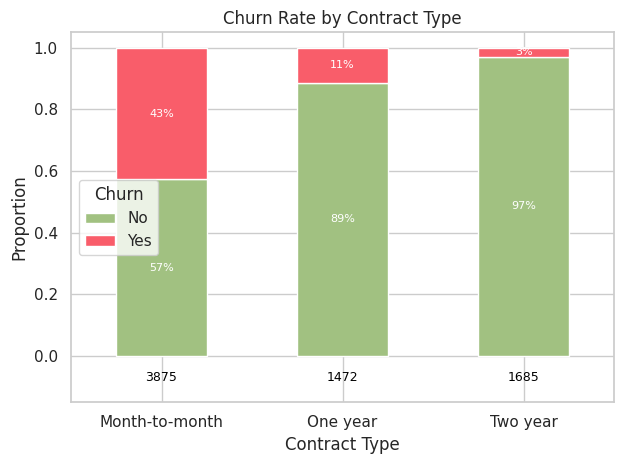

In [70]:
# Grouped data
churn_by_contract = telco_df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_counts = pd.crosstab(telco_df['Contract'], telco_df['Churn'])
contract_counts_total = contract_counts.sum(axis=1)  # total per contract type

# Visualization
b = churn_by_contract.plot(kind='bar', stacked=True, color=['#a1c181','#f95d6a'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentage labels
for container in b.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.02:
            b.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height * 100:.0f}%',
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )

# Add total count below each bar
for i, total in enumerate(contract_counts_total):
    b.text(
        i,
        -0.05,
        f'{total}',
        ha='center',
        va='top',
        fontsize=9,
        color='black'
    )

plt.ylim(-0.15, 1.05)
plt.show()


**Key Takeaways:**
- The longer the contract duration, the lower the likelihood of churn.
- Short-term contracts tend to attract less loyal or trial-phase customers.
- Long-term contracts likely retain customers due to pricing incentives or stronger commitment.

####**3. Both Payment + Contract vs Churn**

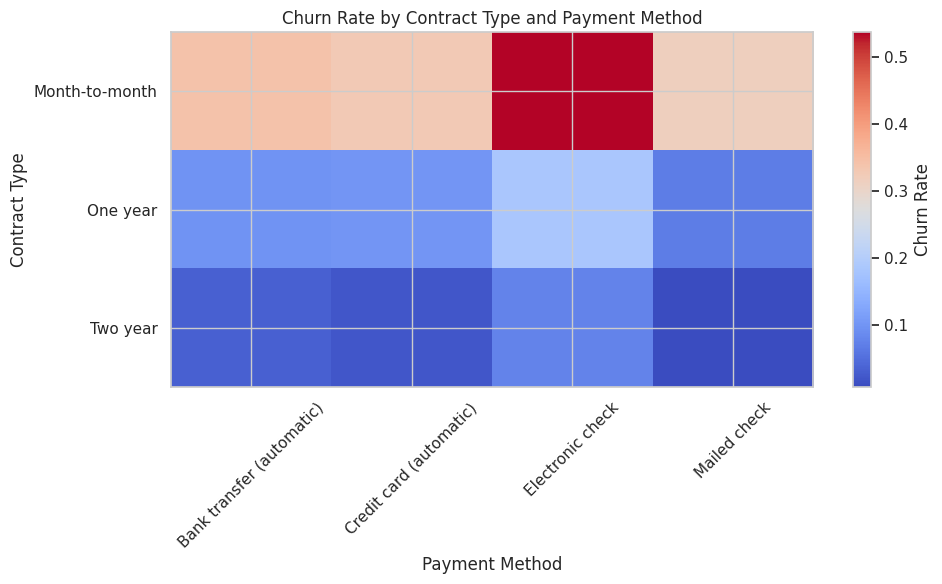

In [36]:
# Churn Rate based on the combination of Payment Method and Contract Tpye
payment_contract = pd.crosstab(
    index=telco_df['Contract'],
    columns=telco_df['PaymentMethod'],
    values=telco_df['Churn'].map({'Yes': 1, 'No': 0}),
    aggfunc='mean'
)

# Visualization
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(payment_contract, cmap='coolwarm', aspect='auto')
plt.colorbar(heatmap, label='Churn Rate')
plt.xticks(ticks=range(len(payment_contract.columns)), labels=payment_contract.columns, rotation=45)
plt.yticks(ticks=range(len(payment_contract.index)), labels=payment_contract.index)
plt.title('Churn Rate by Contract Type and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Contract Type')
plt.tight_layout()
plt.show()

**Key Takeaways**:
1. The highest churn risk is among customers who:
  - Are on month-to-month contracts, and
  - Use Electronic Check as their payment method.
2. Auto-payment methods correlate with higher retention, indicating ease and convenience may influence loyalty.
3. Contract length has a greater effect on churn than payment method, but both combined can refine customer segmentation.

###**4.4 Analyze the impact of add-on services on churn**

####**1. Internet service + add-ons vs Churn**

In [73]:
# All Add-Ons Product
addons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies']

# Only Internet Users
internet_users = telco_df[telco_df['InternetService'] != 'No']

#
internet_users['HasAddon'] = 'Internet Only'

# Loop
for index, row in internet_users.iterrows():
    for addon in addons:
        if row[addon] == 'Yes':
            internet_users.at[index, 'HasAddon'] = 'With Addon'
            break #Stop if found "Yes"

# Hitung proporsi churn berdasarkan kelompok
churn_by_addon = internet_users.groupby('HasAddon')['Churn'].value_counts(normalize=True).unstack()


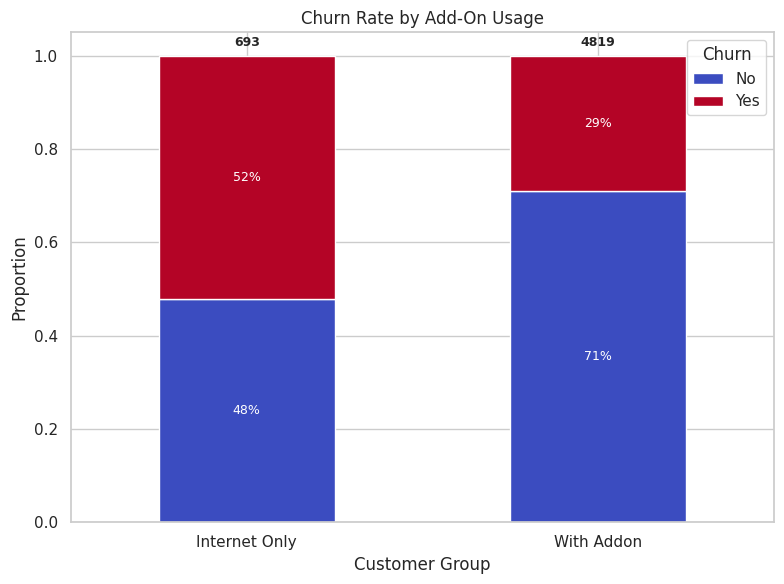

In [76]:
ax = churn_by_addon.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,6))
plt.title('Churn Rate by Add-On Usage')
plt.ylabel('Proportion')
plt.xlabel('Customer Group')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()

# Add % label inside each segment
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.02:  # avoid clutter
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f"{height*100:.0f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )

# Add total count label on top of each bar
group_totals = internet_users.groupby('HasAddon')['Churn'].count()
for i, total in enumerate(group_totals):
    ax.text(i, 1.02, f"{total}", ha='center', fontsize=9, fontweight='bold')

plt.show()

Insights:
- Customers who subscribe to Internet Only have a high churn rate of 52%, meaning more than half discontinue their service.
- In contrast, customers with Add-On services have a much lower churn rate of 29%.
- The retention rate (71%) is significantly higher among customers with additional services, suggesting stronger engagement or satisfaction.

Key Takeaways:
- Add-on service subscribers are less likely to churn, potentially due to higher satisfaction or switching costs.
- Internet-only customers appear to be a high-risk churn segment needing targeted attention.
- Add-on services likely increase customer stickiness, possibly due to better perceived value.



####**2. Top 5 Combination of Add Ons with Less Churn**

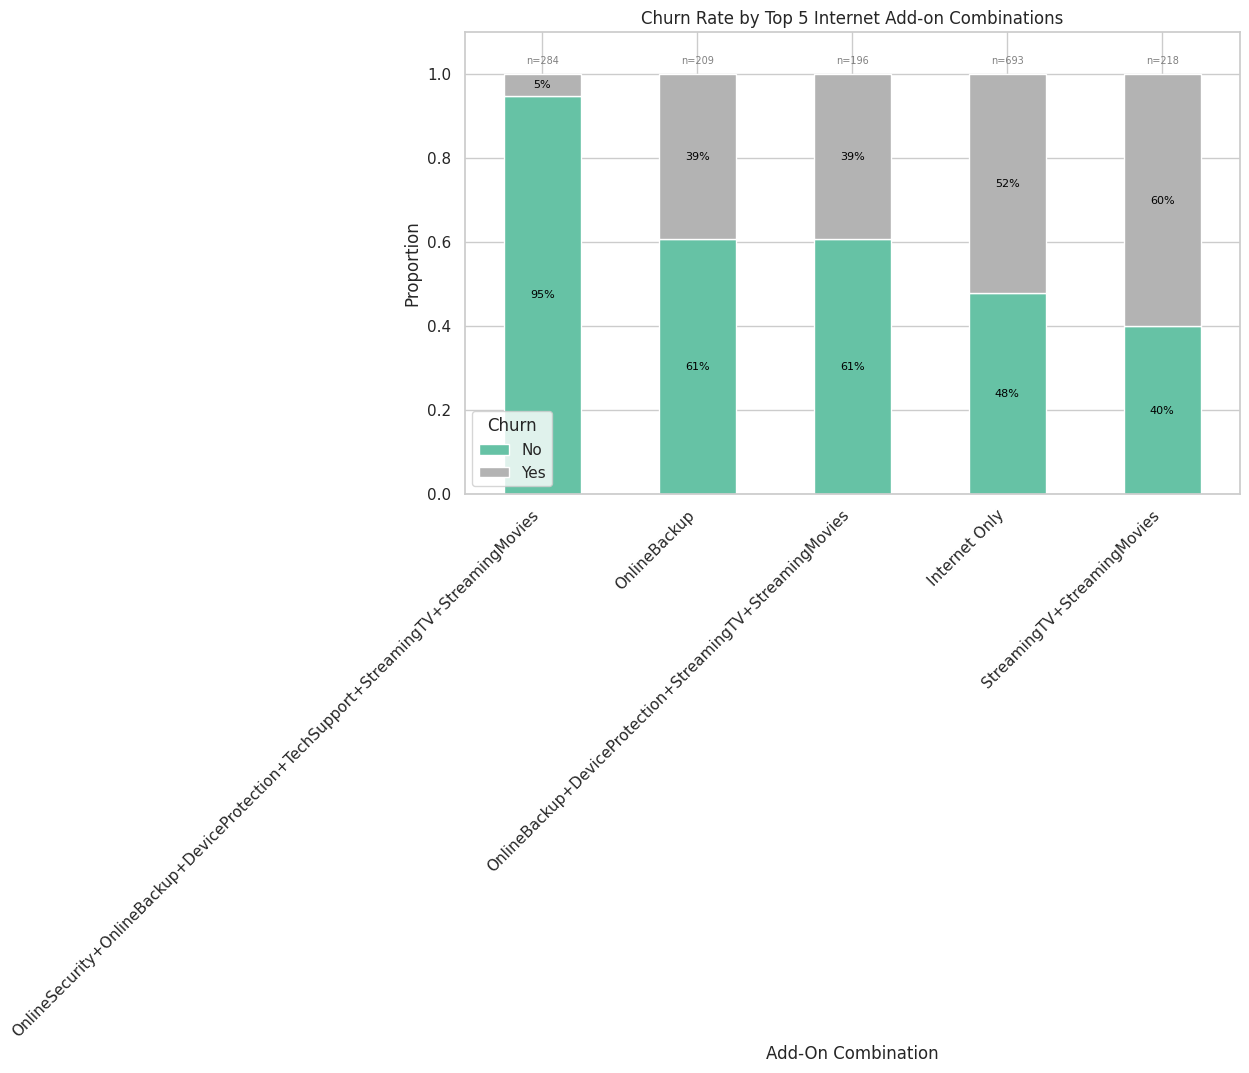

In [81]:
# Create AddonCombo column using regular loop
addon_combos = []
for i in range(len(internet_users)):
    row = internet_users.iloc[i]
    combo = []
    for addon in addons:
        if row[addon] == 'Yes':
            combo.append(addon)
    if combo:
        addon_combos.append('+'.join(combo))
    else:
        addon_combos.append('Internet Only')

internet_users['AddonCombo'] = addon_combos

# Count number of customers per combo
combo_counts = internet_users['AddonCombo'].value_counts()

# Take only the top 5 most common combinations
top_5_combos = combo_counts.head(5).index.tolist()
top_5_users = internet_users[internet_users['AddonCombo'].isin(top_5_combos)]

# Group by combo and churn
churn_combo = top_5_users.groupby('AddonCombo')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Add total number of customers
churn_combo['Total'] = top_5_users['AddonCombo'].value_counts()

# Sort by churn rate (Yes)
churn_combo = churn_combo.sort_values(by='Yes', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = churn_combo[['No', 'Yes']].plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

plt.title('Churn Rate by Top 5 Internet Add-on Combinations')
plt.xlabel('Add-On Combination')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()

# Add labels: % per bar + total customers
for i, (index, row) in enumerate(churn_combo.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            plt.text(
                i,
                bottom + height / 2,
                f"{height * 100:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
        bottom += height
    # Add total customers
    plt.text(
        i,
        1.02,
        f"n={int(row['Total'])}",
        ha='center',
        va='bottom',
        fontsize=7,
        color='gray'
    )

plt.ylim(0, 1.1)
plt.show()

####**2. Top 5 Combinations of Add Ons with Highest Churn**

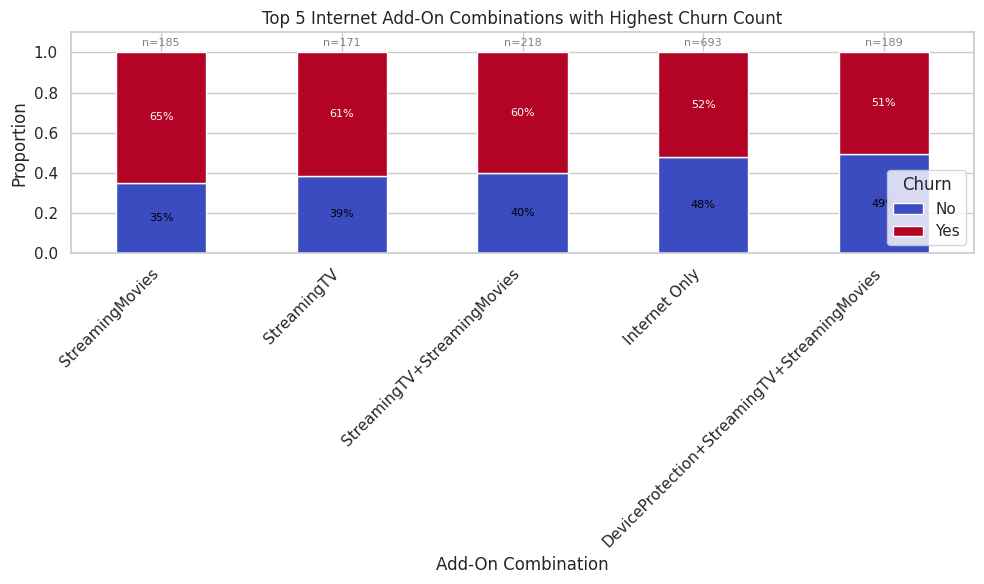

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only customers with Internet service
internet_users = telco_df[telco_df['InternetService'] != 'No'].copy()

# Define internet add-ons
addons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create AddonCombo using regular loop
addon_combos = []
for i in range(len(internet_users)):
    row = internet_users.iloc[i]
    combo = []
    for addon in addons:
        if row[addon] == 'Yes':
            combo.append(addon)
    if combo:
        addon_combos.append('+'.join(combo))
    else:
        addon_combos.append('Internet Only')

internet_users['AddonCombo'] = addon_combos

# Filter churned customers only
churned = internet_users[internet_users['Churn'] == 'Yes']

# Top 5 combos with highest churn count
top_churn_combos = churned['AddonCombo'].value_counts().head(5).index.tolist()

# Filter original data for those top combos
top5_churn_data = internet_users[internet_users['AddonCombo'].isin(top_churn_combos)]

# Group by combo and churn
churn_combo = top5_churn_data.groupby('AddonCombo')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Add total customers per combo
churn_combo['Total'] = top5_churn_data['AddonCombo'].value_counts()

# Sort by churn rate ('Yes')
churn_combo = churn_combo.sort_values(by='Yes', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = churn_combo[['No', 'Yes']].plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

plt.title('Top 5 Internet Add-On Combinations with Highest Churn Count')
plt.xlabel('Add-On Combination')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()

# Add % and total count labels
for i, (index, row) in enumerate(churn_combo.iterrows()):
    bottom = 0
    for churn_status in ['No', 'Yes']:
        height = row[churn_status]
        if height > 0.03:
            plt.text(
                i,
                bottom + height / 2,
                f"{height * 100:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='white' if churn_status == 'Yes' else 'black'
            )
        bottom += height
    # Total customers
    plt.text(
        i,
        1.02,
        f"n={int(row['Total'])}",
        ha='center',
        va='bottom',
        fontsize=8,
        color='gray'
    )

plt.ylim(0, 1.1)
plt.show()


####**3. Phone Service (single/multiple lines) vs Churn**

In [77]:
# Filter customers who use phone service
phone_users = telco_df[telco_df['PhoneService'] == 'Yes'].copy()

# Categorize: Phone Only vs. Phone + Multiple Lines
phone_users['PhoneGroup'] = 'Phone Only'
for i in phone_users.index:
    if phone_users.loc[i, 'MultipleLines'] != 'No':
        phone_users.loc[i, 'PhoneGroup'] = 'Phone + Multiple Lines'

# Calculate churn proportion by group
churn_by_phone = phone_users.groupby('PhoneGroup')['Churn'].value_counts(normalize=True).unstack()

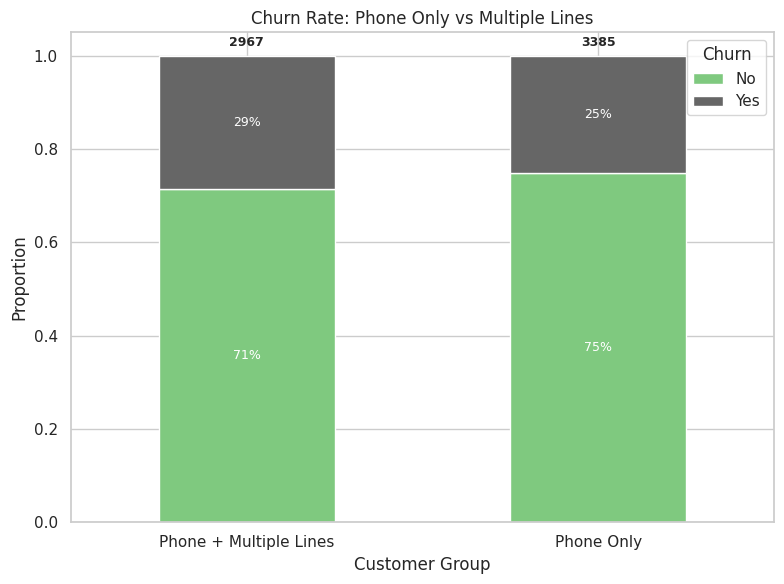

In [79]:
# Bar Plot
ax = churn_by_phone.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8,6))
plt.title('Churn Rate: Phone Only vs Multiple Lines')
plt.xlabel('Customer Group')
plt.ylabel('Proportion')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.02:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f"{height*100:.0f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )

# Add total count above each bar
group_totals = phone_users.groupby('PhoneGroup')['Churn'].count()
for i, total in enumerate(group_totals):
    ax.text(i, 1.02, f"{total}", ha='center', fontsize=9, fontweight='bold')

plt.show()

Insights:
1. Phone Only customers have a lower churn rate (25%) compared to those with Multiple Lines (29%).
2. Retention is slightly higher among Phone Only users (75%), suggesting they may be more satisfied or less likely to switch.

Key Takeaways:
1. The difference in churn is relatively small between the two groups (4%).
2. Having multiple lines may introduce complexity, cost, or issues that increase the likelihood of churn.
3. Simpler service bundles (Phone Only) may promote customer stability.



##**05. Data Visualization - Dashboard**

Below is data visualization of Telco Customer Churn using Looker Studio:

Link: https://lookerstudio.google.com/reporting/322fec3e-947a-4347-b2f6-04ed92030479/page/Q6jSF

##**06. Key Takeaways & Strategic Recommendations**

###**Key Takeaways**

####**6.1 Demographics**

#####**Gender**
*Data Insight:*
- Both male and female customers show relatively similar churn proportions.
- No significant difference in churn rate between genders.

*Key Takeaways*:
- Gender does not appear to be a strong predictor of churn in this dataset.

*Strategic Recommendation*:
- Focus churn prevention strategies on other segments rather than targeting by gender.
- Gender can still be used to tailor marketing tone or content, but not for prioritizing churn risk.


#####**Senior Citizens**

*Insight:*
- Senior citizens churn at a significantly higher rate than non-seniors.
- Even with few sample than the other segment, they are more vulnerable to churn.

*Key Takeaway*:
- Senior customers are high-risk churners and need targeted attention.

*Strategic Recommendation*:
- Offer senior-friendly plans, simplified services, and personalized tech support.
- Run retention campaigns tailored to this group, such as: onboarding help, follow up call, etc
- Explore senior loyalty programs or family-assist features.

#####**Dependents**

*Insight:*
- Customers without dependents are more likely to churn.
- Having dependents may reflect greater need for reliable and stable service.

*Key Takeaway*:
- Customers with families are more loyal, while individuals are more likely to churn

*Strategic Recommendation*:
- Offer family-friendly packages, like multi-device plans or parental control features

#####**Partners**

*Insight*:
- Customers without a partner churn more frequently.
- Having a partner may indicate higher stability and shared service usage.

*Key Takeaway*:
- Single customers are more churn-prone and may need more individualized offerings.

*Strategic Recommendations*:
- Create solo-living bundles and emphasize independence and value.
- Promote couples/family plans to encourage retention among partnered customers.



#### **6.2 Tenure vs Churn**
**Data Insight**:
- It has been observed that customers who have been with a company for a longer period tend to have a higher propensity to remain with the company.

**Business Strategy**:
1. For loyal customers, marketing team should nurturing and amplifying them to to prevent them from potentially churning in the future. Some strategies to be considered:
- Deepening Engagement with customer by personalize communication
  - Birthday greeting and giving them small bonuses or price discount for staying with company services.
  - Proactive service evaluation and report.

Expected Result:
Customers feel uniquely valued, understood, and that the company is invested in their ongoing satisfaction.

- Implementing exclusive loyality programs.
  - Dedicated customer support and account manager
  - Early access to new product and technologies

Expected Result:
Elite treatment, a sense of privilege, and direct access to cutting-edge services reinforce their decision to stay.

2. For churned customers, marketing team should conducting targeted and personalized win-back marketing campaign to make them back with company services. Some strategies to be considered:
- Limited-time-win-back promotion
  - Giving them best deal promotion based on the reason why they stop using company services. If the reason is about price, give them a steal deal discount. If the reason is about quality, offer them with a guarantee customer satisfaction.

Expected result: The churned customers is expected to be back as sooner as possible with spesific time period to use company services again.

####**6.3 Monthly Charges vs Churn**

**Insights**:
- Customers with low monthly charges churn the least:
  - Only 11% churn rate in the Low group (208 churned out of 1811).
- Churn rate increases with monthly charges:
  - Mid: 25% churn
  - Upper Mid and High: 34% churn
- The churn rate plateaus at the Upper Mid and High levels, despite a significant increase in monthly spend.

**Key Takeaways**:
- Higher cost doesn't guarantee loyalty. In fact, it may increase churn risk.
- Customers in the Low monthly charge group are significantly more loyal.

**Business Strategy**:

####**6.4 Payment Type vs Churn**
**Insights**:
- Electronic check users churn the most, 45% churn rate, far higher than other methods.
- Automatic payments (bank transfer & credit card) have the lowest churn rates:
  - Bank Transfer (auto): 17% churn
  - Credit Card (auto): 15% churn
- Mailed Check has a moderate churn rate of 19%, still significantly lower than electronic checks.

**Key Takeaways**:
- Customers using manual or less convenient payment methods (esp. electronic checks) are more likely to churn.
- Automatic payment methods correlate with higher customer retention.
- There's likely a behavioral or demographic distinction among those using electronic checks.



**Business Strategy:**

The company should evaluate customer experience when paying their bills using this type of payment method. This evaluation will help the company identify any issues or negative experiences that may have led the customer to discontinue using the company's services.

####**6.5 Contract Type vs Churn**
**Data Insights:**
- The longer the contract duration, the lower the likelihood of churn.
- Short-term contracts tend to attract less loyal or trial-phase customers.
- Long-term contracts likely retain customers due to pricing incentives or stronger commitment.

**Business Strategy:**

####**6.6 Internet Service Add Ons vs Churn**

**Data Insights**:
- Customers who subscribe to Internet Only have a high churn rate of 52%, meaning more than half discontinue their service.
- In contrast, customers with Add-On services have a much lower churn rate of 29%.
- The retention rate (71%) is significantly higher among customers with additional services, suggesting stronger engagement or satisfaction.

**Key Takeaways**:
- Add-on service subscribers are less likely to churn, potentially due to higher satisfaction or switching costs.
- Internet-only customers appear to be a high-risk churn segment needing targeted attention.
- Add-on services likely increase customer stickiness, possibly due to better perceived value.

**Business Strategy**:


####**6.7 Phone Service Add Ons vs Churn**

**Insights**:
1. Phone Only customers have a lower churn rate (25%) compared to those with Multiple Lines (29%).
2. Retention is slightly higher among Phone Only users (75%), suggesting they may be more satisfied or less likely to switch.

**Key Takeaways**:
1. The difference in churn is relatively small between the two groups (4%).
2. Having multiple lines may introduce complexity, cost, or issues that increase the likelihood of churn.
3. Simpler service bundles (Phone Only) may promote customer stability.

**Business Strategy**:

###**Strategic Recommendations**

**1. Increase Add-On Adoption**
- Promote add-on services (e.g., streaming, cloud storage, device protection) as they are correlated with lower churn (only 29% churn vs 52% in Internet-only users).

- Bundle attractive add-ons with core internet plans to enhance value perception and customer stickiness.

- Use targeted marketing campaigns to upsell add-ons to existing internet-only users.

**2. Deep Dive into Churn Drivers for Internet-Only Users**
- Conduct surveys or interviews to understand dissatisfaction among internet-only customers.

- Explore reasons like pricing, service quality, or perceived lack of value.

- Offer tailored retention programs such as personalized offers, discounts, or service upgrades.

**3. Optimize Multi-Line Phone Services**
- Investigate why customers with multiple lines churn more than phone-only users (29% vs 25%).

- Simplify multi-line plans to reduce confusion and improve manageability.

- Introduce tiered discounts or loyalty programs for families or households using multiple lines.

**4. Personalize Communication and Support**
- Use churn likelihood modeling to proactively reach out to at-risk customers.

- Offer dedicated customer support for high-risk segments (e.g., multi-line users, internet-only subscribers).

- Encourage feedback through NPS or CSAT to identify pain points early.

**5. Build Targeted Retention Campaigns**
- Segment users based on service usage (add-on vs internet-only, single line vs multi-line).

- Tailor retention strategies per segment such as, education, benefit reminders, loyalty rewards, or exit offers.

- Monitor churn metrics and customer behavior post-campaign to evaluate success.

